# Plotting Covid-19 data from Belgium

Source of data: [RTBF](https://www.rtbf.be/info/societe/detail_coronavirus-en-belgique-les-chiffres-du-nombre-de-personnes-hospitalisees-infographie?id=10458755). Last update 31/03.

Source for 01/04: [RTBF](https://www.rtbf.be/info/belgique/detail_coronavirus-en-belgique-suivez-en-direct-le-bilan-quotidien-du-centre-de-crise?id=10472832)

Source for 07/04: [Le Soir](https://www.lesoir.be/292851/article/2020-04-07/coronavirus-2035-deces-au-total-en-belgique-314-nouvelles-hospitalisations)

This is not (data) science, it's just a plot of some data and a linear regression.

License [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [1]:
%pylab inline
import requests
import pandas as pd
from datetime import date, timedelta

import matplotlib
matplotlib.rc('figure', figsize=(15, 8))

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_all(columns=['TOTAL_IN', 'TOTAL_IN_ICU', 'TOTAL_IN_RESP', 'TOTAL_IN_ECMO'], figsize=(24, 12)):
    def wrapper(func):
        n_plots = len(columns)
        n_cols = int(ceil(np.sqrt(n_plots)))
        n_rows = int(ceil(n_plots / n_cols))
        fig = plt.figure(figsize=figsize)
        for i, col in enumerate(columns):
            row = 1 + i // n_cols
            ax = fig.add_subplot(n_rows, n_cols, i+1)
            func(ax, col)
            ax.set_title(col)
        fig.suptitle(' '.join(func.__name__.split('_')))
    return wrapper

In [3]:
sciensano_data = requests.get('https://epistat.sciensano.be/Data/COVID19BE_HOSP.csv')
with open('hospital-data-be.csv', 'wb') as out:
    out.write(sciensano_data.content)
df = pd.read_csv('hospital-data-be.csv')
df = df.groupby([pd.to_datetime(df.DATE), df.PROVINCE]).sum().unstack()

In [4]:
PEAK_FIRST_WAVE = df[:'2020-07-21'].max()
PEAK_FIRST_WAVE

              PROVINCE      
NR_REPORTING  Antwerpen         17
              BrabantWallon      3
              Brussels          16
              Hainaut           15
              Limburg            7
                                ..
NEW_OUT       Luxembourg        17
              Namur             23
              OostVlaanderen    75
              VlaamsBrabant     34
              WestVlaanderen    57
Length: 77, dtype: int64

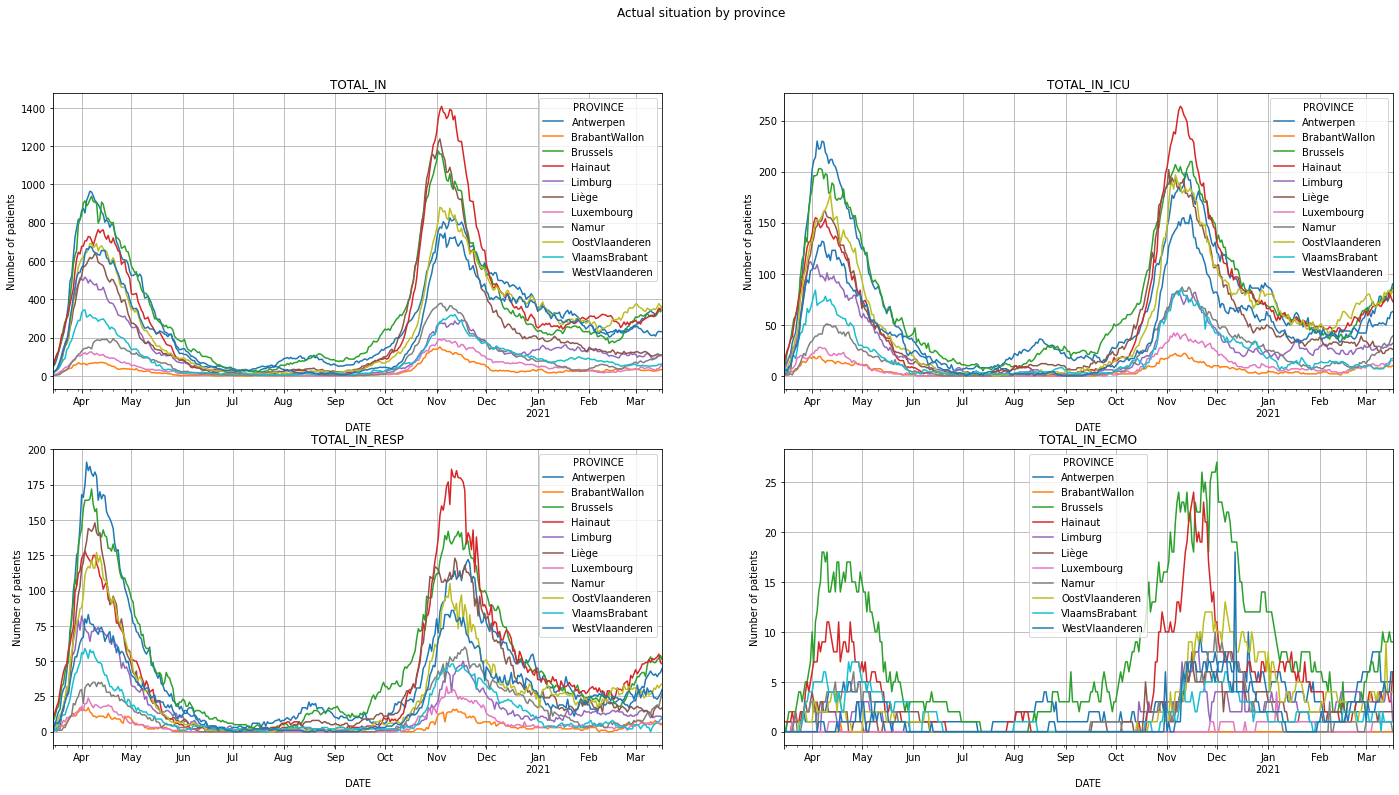

In [5]:
@plot_all()
def Actual_situation_by_province(ax, col):
    df[col].plot(ax=ax)
    ax.grid()
    ax.set_ylabel('Number of patients')

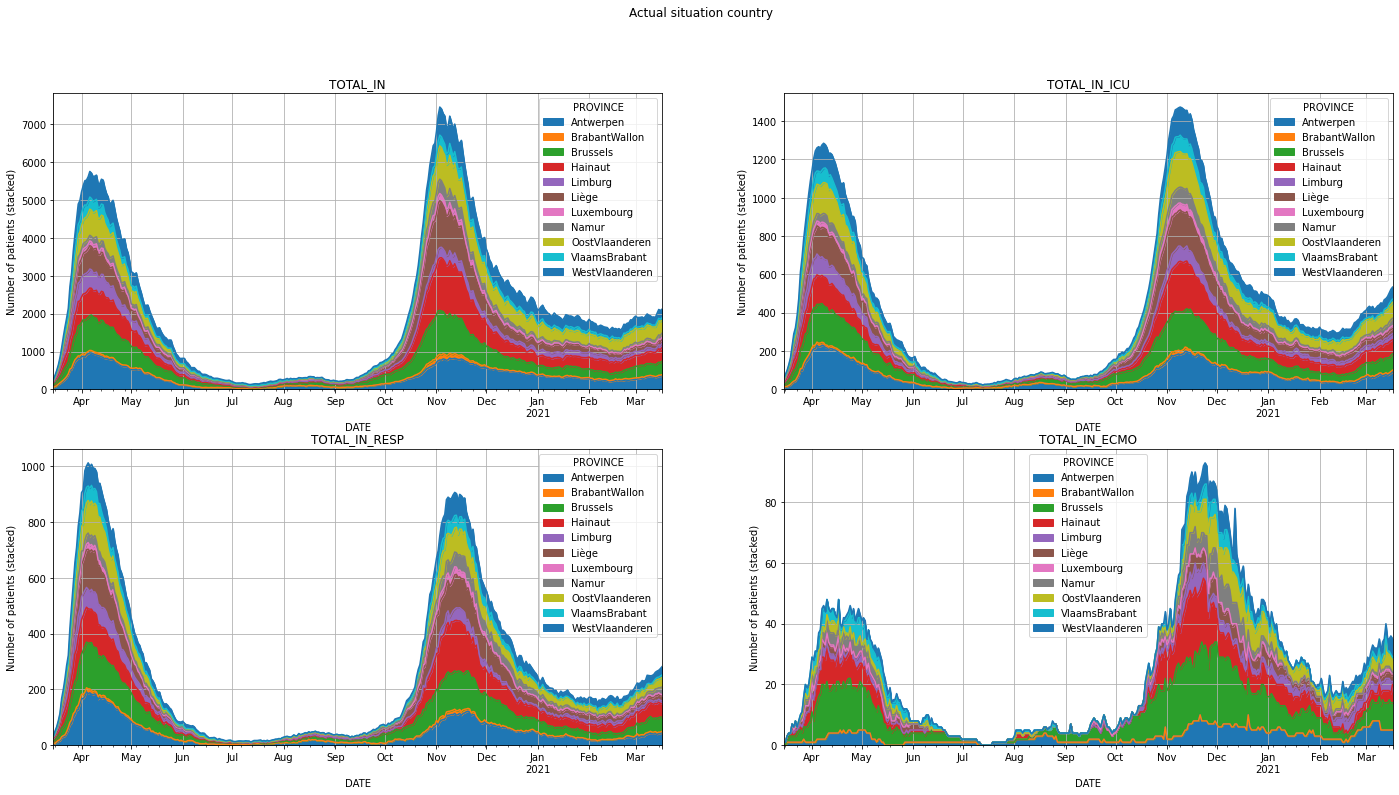

In [6]:
@plot_all()
def Actual_situation_country(ax, col):
    df[col].plot(kind='area', stacked=True, ax=ax)
    ax.grid()
    ax.set_ylabel('Number of patients (stacked)')

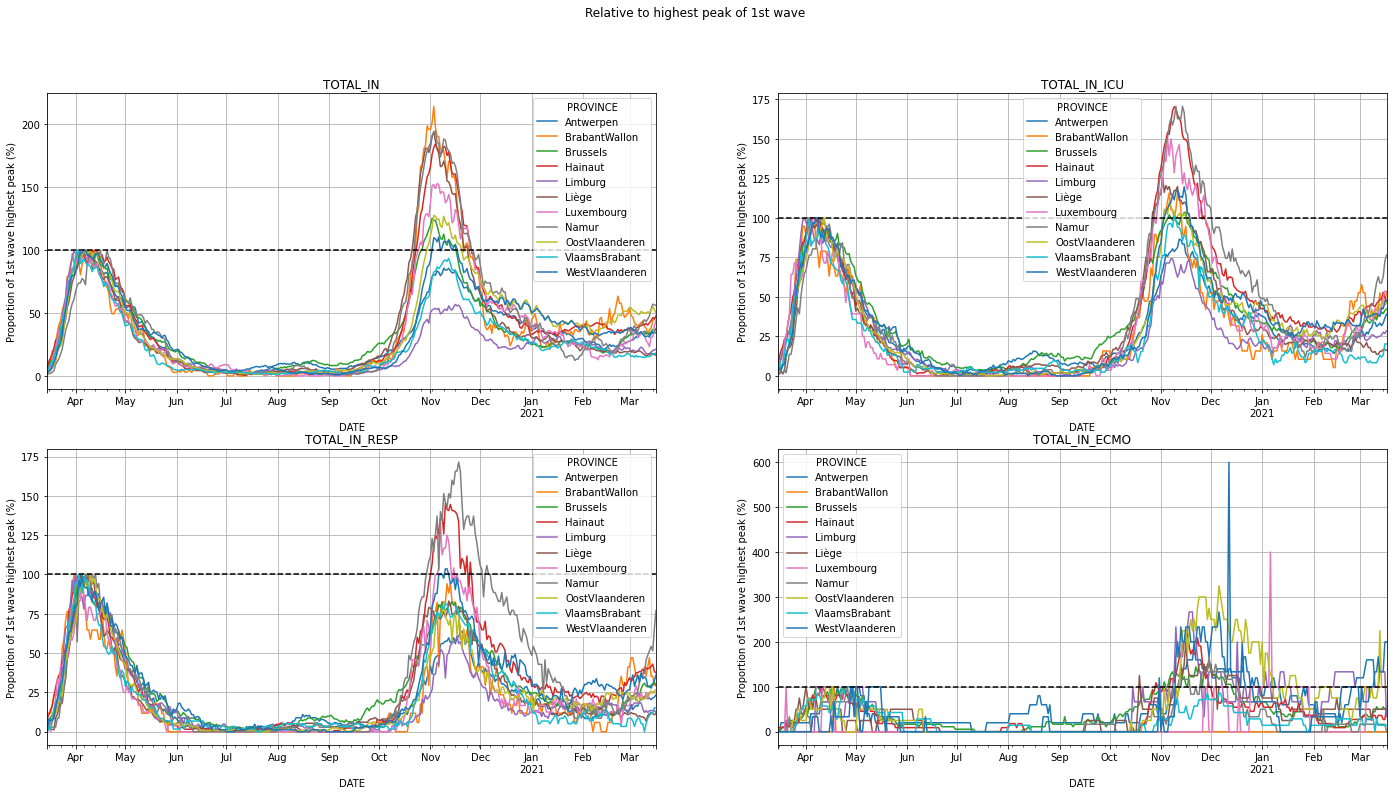

In [7]:
@plot_all()
def Relative_to_highest_peak_of_1st_wave(ax, col):
    (100 * df / PEAK_FIRST_WAVE)[col].plot(ax=ax)
    ax.grid()
    ax.axhline(100, c='k', ls='--')
    ax.set_ylabel('Proportion of 1st wave highest peak (%)')

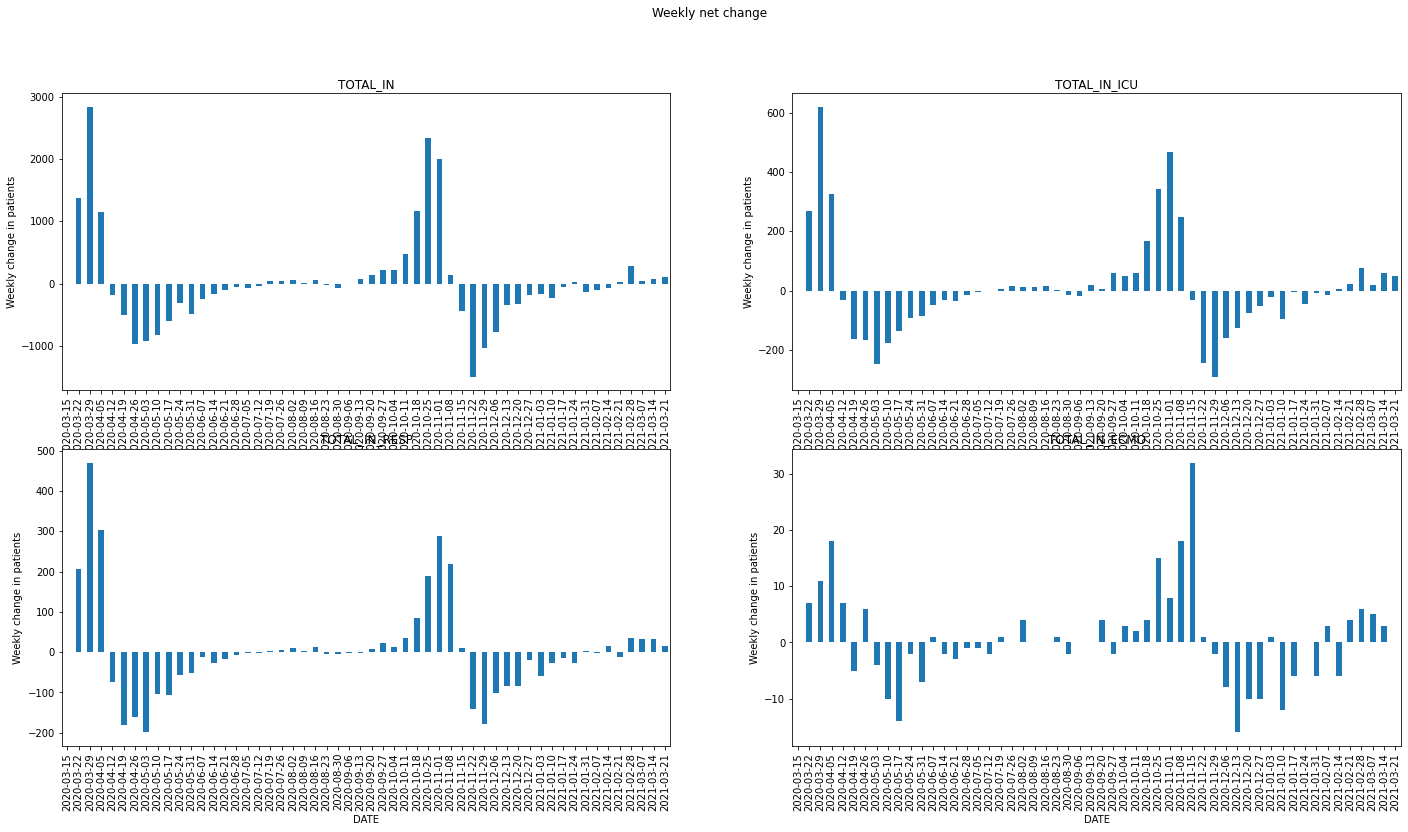

In [8]:
@plot_all()
def Weekly_net_change(ax, col):
    weekly_change = df[col].sum(axis=1).diff().resample('1w').sum()
    weekly_change.reindex([x.date() for x in weekly_change.index]).plot(kind='bar', ax=ax)
    ax.set_ylabel('Weekly change in patients')

<AxesSubplot:xlabel='DATE'>

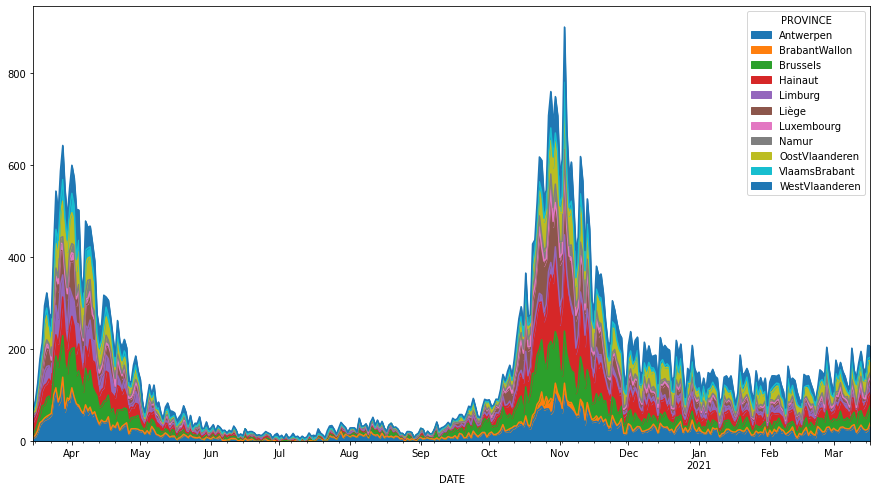

In [9]:
df.NEW_IN.plot(kind='area', stacked=True)

<AxesSubplot:xlabel='DATE'>

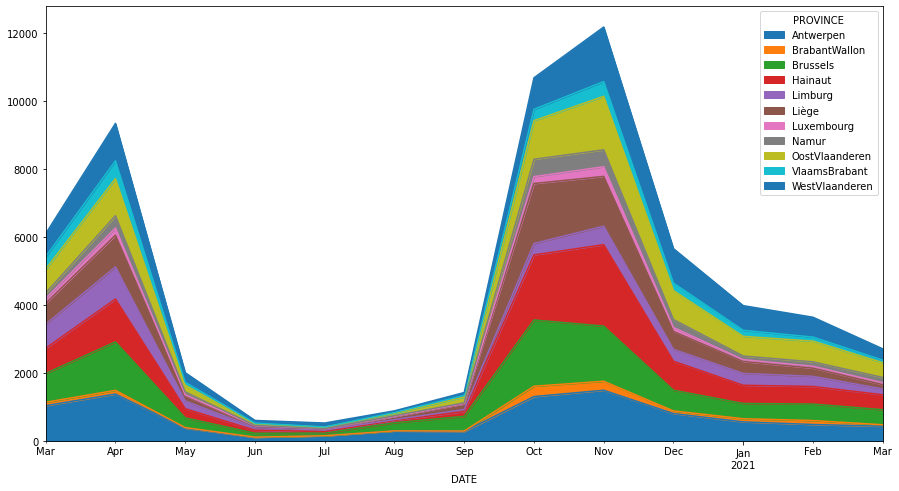

In [10]:
df.NEW_IN.resample('1M').sum().plot(kind='area', stacked=True)

<AxesSubplot:xlabel='DATE'>

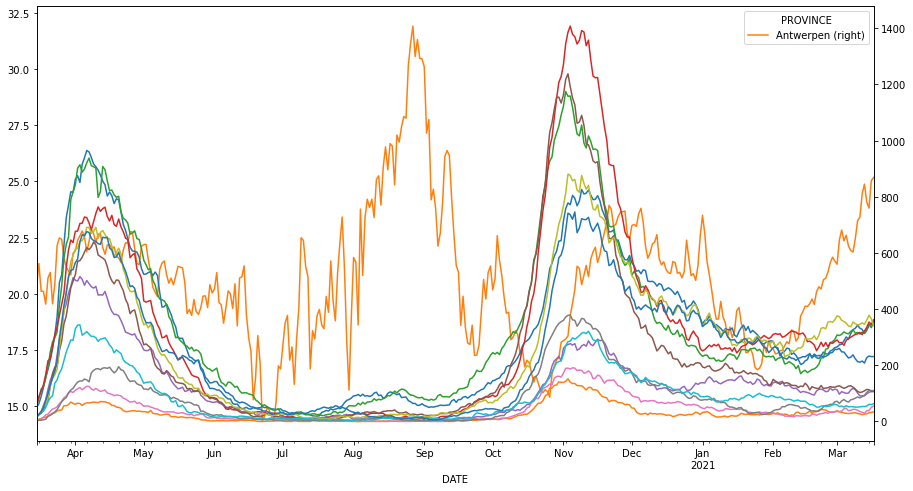

In [11]:
df.TOTAL_IN.plot(secondary_y=True)
(100 * df.TOTAL_IN_ICU.sum(axis=1) / df.TOTAL_IN.sum(axis=1)).plot()

In [12]:
df.NEW_IN.describe()

PROVINCE,Antwerpen,BrabantWallon,Brussels,Hainaut,Limburg,Liège,Luxembourg,Namur,OostVlaanderen,VlaamsBrabant,WestVlaanderen
count,368.000000,368.000000,368.000000,368.00000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,23.910326,3.122283,24.407609,25.19837,11.250000,17.633152,3.250000,6.241848,20.383152,6.608696,20.578804
std,22.280968,4.712294,26.079467,31.03064,13.258589,24.468268,4.331936,7.735314,21.203373,8.089697,20.940536
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,7.000000,4.00000,2.000000,2.750000,0.000000,0.000000,3.000000,1.000000,4.000000
50%,18.000000,2.000000,16.500000,16.00000,7.000000,8.000000,1.000000,4.000000,16.000000,4.000000,16.000000
75%,30.000000,4.000000,30.000000,32.25000,15.000000,20.000000,4.250000,9.000000,29.000000,9.000000,29.000000
max,131.000000,34.000000,124.000000,177.00000,91.000000,146.000000,21.000000,40.000000,114.000000,47.000000,120.000000
